In [142]:
using Plots, Interact, DifferentialEquations, BifurcationKit, Setfield, ForwardDiff
using NonLinearDynamicsCourse

## Ciclo Límite y Bifurcación de Hopf en Modelo de Predador Presa

Vamos a ver un ejemplo de sistema que sufre una bifurcación de Hopf supercrítica y da origen a autooscilaciones. Se trata de un modelo poblacional de dos especies, una que preda a la otra. A diferencia del modelo de Lotka-Volterra que no presentaba **estabilidad estructural** en este caso para ciertos valores de parámetros vamos a tener un ciclo límite atractor que va a dar lugar a oscilaciones robustas en ambas poblaciones: si el sistema está oscilando en este ciclo y realizamos una perturbación razonable que no lleve a la extinción luego de un tiempo el sistema vuelve a la misma órbita periódica (y no salta de orbita como pasaba en el LV).

### [OPCIONAL] descripcion y adimensionalizacion del modelo

Podemos plantear un modelo de Predador-Presa más realista y ver si podemos obtener auto oscilaciones. Para empezar podemos reemplazar el termino de crecimiento exponencial $bx$ de la presa por un crecimiento logistico con una capacidad $K$. Luego en lugar de asumir que el impacto de la predacion en la poblacion de la presa es siempre proporcional al producto de la presa por el predador podemos asumir que satura en un momento determinado (el predador no es insaciable). Si $N$ es la poblacion de la presa y $P$ la del predador la ecuacion para la varicion de la poblacion de la presa seria:

$\dot{N}=RN \displaystyle \left( 1-  \frac{N}{K} \right) - PNf(N)$

Con $f(N)$ una funcion que satura, vamos a tomar una forma simple $f(N) = A/(N+C)$.

Por otro lado podemos suponer simplemente para la poblacion del predador $P$ un crecimiento logistico donde la capacidad es proporcional a la poblacion de la presa con lo cual la segunda ecuacion quedaria:

$\dot{P}=SP\displaystyle \left(1-\frac{P}{BN}\right)$

Tenemos seis parametros ($R,S,K,A,B,C$), pero se pueden reducir si adimensionalizamos las poblaciones: $x=N/K$ $y=P/(BK)$. Al principio las ecuaciones se complican (dividimos la de arriba por $K$ y la de abajo por $BK$):

$\displaystyle\frac{d(N/K)}{dt}=\displaystyle\frac{RN}{K} \displaystyle \left( 1-  \frac{N}{K} \right) - \displaystyle\frac{PAN}{K^2(N/K+C/K)}$

$\displaystyle\frac{d(P/(BK))}{dt}= \displaystyle\frac{SP}{BK}\displaystyle \left(1-\frac{P}{BN}\right)$

reemplazando por la definición de las variables adimensionalizadas, dividiendo ambas ecuaciones por $R$ y reescalando el tiempo por $\tau=tR$:

$\displaystyle\frac{dx}{d\tau}=x\displaystyle \left( 1-  x \right) - \displaystyle\frac{ABxy}{R(x+C/K)}$

$\displaystyle\frac{dy}{d\tau}= \displaystyle\frac{S}{R}y\displaystyle \left(1-\frac{y}{x}\right)$


si redefinimos parametros: $a=AB/R$, $b=S/R$, $c=C/K$ las ecuaciones para las poblaciones adimensionalizadas de presa ($x$) y predador ($y$) quedan escritas de una forma mas compacta (ahora el punto es la derivada con respecto a $\tau$)

## Modelo adimensionalizado

$\dot{x} = x(1-x)-\displaystyle \frac{axy}{x+c}$

$\dot{y} = by\displaystyle \left( 1-\frac{y}{x}\right)$

que depende solo de tres parametros $a,b,c$. La contra es que ahora los parametros son mas dificiles de interpretar. Por ejemplo $b$ representa como es la tasa de crecimiento de la poblacion de predadores **relativa** a la tasa de crecimiento de la poblacion de presas, $c$ esta vinculada a la fraccion de la poblacion maxima de presa a la que satura la predacion, pero $a$ es mas dificil de interpretar ya que crece tanto con la accion de la predacion como con la capacidad de la poblacion de los predadores relativa a la capacidad de la poblacion de la presa.

Para un valor fijo de $a>0.5$ las dos poblaciones llegan a un punto fijo con un mismo valor $x=y$ para valores de $b$ y $c$ altos, pero si esto parametros disminuyen las poblaciones comienzan a oscilar. A diferencia del modelo de Lotka-Volterra, esta oscilacion es estructuralmente estable, todas las trayectorias convergen al **ciclo limite**. 

In [ ]:
function predatorprey!(du,u,p,t)
    (a,b,c) = p
    du[1] = u[1]*((1.0-u[1]) - a*u[2]/(c+u[1]))
    du[2] = b*u[2]*(1.0-u[2]/u[1])
    du
end    

In [ ]:
@manipulate throttle=0.2 for xini=0:0.1:1, yini=0:0.1:1,a=0.01:0.01:2,b=0.01:0.01:1,c=0.01:0.01:1
    flux2d_nullclines(predatorprey!,[xini;yini],100.0,[a,b,c],xlims=[0.01,1.0],ylims=[0.01,1.0])
end    

Si bien las ecuaciones parecen mas complicadas las nulclinas no lo son tanto restringidas al dominio no negativo. Ademas de una nulclina en $y=0$ tenemos la recta $y=x$ para la segunda nulclina (linea diagonal verde) y una cuadratica que sale de la primera ecuacion que puede despejarse como:

$y=(x+c)(1-x)/a$

que es una parabola invertida que corta el eje horizontal en los puntos $x=1$ , $x=-c$ (fuera del dominio), y corta el eje vertical en $y=c/a$

En el dominio tenemos dos puntos fijos:

- donde se corta la parabola con el eje horizontal $x=1$, $y=0$ que es siempre un punto silla (esto se puede ver calculando el Jacobiano que en ese punto fijo tiene determinante igual a $-b$)
- donde se corta la parabola con la diagonal $x=y$ vamos a calcular la ubicacion de es punto fijo que es el que da lugar a la bifurcacion de Hopf


Haciendo $y=x$ en la ecuacion del a nulclina de la parabola y tomando solo la solucion positiva dentro del dominio tenemos:

$x_*  =   \frac{1-a-c}{2} + \sqrt{ \left( \frac{1-a-c}{2} \right)^2 + c}$

aun cuando $1-a-c$ es negativo la raiz es mayor en modulo por lo tanto siempre hay una raiz positiva.

Notar que tanto el punto fijo como las nulclinas no dependen del parametro $b$ sin embargo este si influencia en la estabilidad. 

## Estabilidad de los puntos fijo (opcional)

Calcular el jacobiano y evaluarlo los puntos fijos puede ser un poco arduo pero fijando $a=1$ y luego de algunas cuentas el Jacobiano queda expresado:

\begin{pmatrix}
1 -2x - \frac{cy}{(x+c)^2} & -\frac{x}{x+c}\\
b\frac{y^2}{x^2} & -b
\end{pmatrix}

el punto fijo es ahora 

$x_*  =  \displaystyle -\frac{c}{2} + \sqrt{\displaystyle \frac{c^2}{4}  + c}$

tras un poco de algebra la matriz Jacobiana queda:

\begin{pmatrix}
\frac{c^2}{2}  +\frac{5c}{2}+1-(c+3)\sqrt{\frac{c^2}{4}+c} & \sqrt{\frac{c^2}{4}+c}-\frac{c}{2}-1\\
b & -b
\end{pmatrix}


El determinante queda un poco mas simple:

$\Delta = b\left( (c+2)\sqrt{\frac{c^2}{4}+c}-\frac{c^2}{2}- 2c\right)$

que con un poco de trabajo (o graficando) se puede ver que es siempre negativo. 

Mientras que la traza puede ser positiva o negativa y se hace cero cuando (condicion de la bifurcacion de Hopf):

$b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$

En la seccion siguiente vamos a ver el significado de esa condicion expresada como $b$ en funcion de $c$ que determina una curva en el espacio de parametros $(b,c)$.

# Codimension de una bifurcacion

Si bien en el modelo anterior tuvimos que mover tres parametros para buscar la bifurcacion de Hopf (probar por ejemplo con $a=1$, $b=0.25$ y bajar el parametro $c$ cruzando el valor $0.1$), en realidad la bifurcacion de Hopf,  al igual que la de nodo-silla, se cruza moviendo un solo parametro. Mas adelante vamos a ver bifurcaciones donde es necesario sintonizar dos parametros de forma simultanea para "pegarle" a la bifurcacion. De manera informal la cantidad de parametros que es necesario ajustar de forma simultanea para cruzar una bifurcacion corresponde a la **codimension** de la bifurcacion (hay una definicion mas formal pero no es relevante ahora). Todas las bifurcaciones que vimos hasta ahora son de codimension 1.

Por ejemplo en el caso anterior podemos fijar $a=1$, $b=0.25$ y buscar la bifurcacion de Hopf usando solo el parametro $c$. En este caso nuestro "espacio de parametros" es 1D. Pero tambien podemos fijar $a$ y $c$ y usar $b$ (queda como ejercicio la otra posibilidad de usar $a$ como parametro de la bifurcacion). 

Que sucede si fijamos $a=1$ y usamos un espacio de parametros 2D formado por los restantes parametros? Esto es absolutamente legitimo. En ese caso la bifurcacion de Hopf no ocurre en un punto sino en una curva en ese plano que se puede cruzar en ambas direcciones (es decir no es paralela a uno de los ejes). Este tipo de diagrama de bifurcacion es util porque si bien la bifurcacion puede ser de codimension 1 nos puede interesar como esa bifurcacion depende de dos parametros de control. La curva que derivamos en la seccion anterior como condicion de Hopf (la traza nula con el determinante positivo), corresponde exactamente a esa curva, pero vamos a usar primero el paquete BifurcationKit para calcular numericamente la bifurcacion.

Vamos a estudiar primero la bifurcacion en un espacio de parametros 1D (variando solo $c$) y luego vamos a tratar de esbozar el diagrama en el espacio $(b,c)$

In [ ]:
predatorprey(u,p) = predatorprey!(similar(u),u,p,0)
opts = ContinuationPar(pMin=0.05,pMax=0.15, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.3,0.3],[1.0,0.25,0.05],(@lens _[3]), opts)
plot(br1)

La rama del foco (br) ademas de poder graficarse tiene la información del punto especial hopf. Los puntos especiales que encuentra en la rama los guarda en un array `specialpoint` 

In [ ]:
br1.specialpoint

que en este caso tiene un solo elemento. Ese punto tiene el valor del parametro que se barrio ($c$) para el cual se produce la bifurcacion almacenado en `param`. Por lo tanto ahora podemos barrer el parametro $b$ en un loop y para cada valor de $b$ calculamos la rama igual que antes y extraemos el valor de $c$ que corresponde a la bifurcacion con `br1.specialpoint[1].param`. 

De esta forma podemos armar un array de valores de $c$ (clist) para los cuales el sistema bifurca, en funcion de los valores de $b$ (blist) y eso es una curva en el espacio de parámetros $(b,c)$ que corresponde a la bifurcación de Hopf. Recordar que $a$ esta fijo en el valor 1.

In [ ]:
blist = [0.01*n for n in 1:50]
opts = ContinuationPar(pMin=0.15,pMax=0.25, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[1],0.15],(@lens _[3]), opts)
c = br1.specialpoint[1].param
clist = [c]
for n=2:50
    opts = ContinuationPar(pMin=0.8*c,pMax=1.2*c, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
    br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[n],0.8*c],(@lens _[3]), opts)
    c = br1.specialpoint[1].param
    append!(clist,c)
end    
plot(blist,clist,xlabel="b",ylabel="c",title="Espacio de Parámetros",label="Hopf")


Anteriormente deducimos una expresión teórica para la curva de Hopf $b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$ a partir de igualar a cero la traza del Jacobiano. Podemos comparar el valor teórico de la curva con el resultado numérico de BifurcationKit (BK). En la figura de abajo se muestra la curva teórica como una linea continua y los valores de BK con marcadores azules.

In [ ]:
scatter(blist,clist,label="BK")
bteo = @. 0.5*clist^2+2.5*clist+1-(clist+3)*sqrt(abs2(clist)/4+clist)
plot!(bteo,clist,xlabel="b",ylabel="c",title="Espacio de Parámetros",label="Teorico")

# Bifurcaciones de Codimension 2: Cusp

Para tener una bifurcacion de codimension 2 no es necesario que haya dos variables. El modelo de crecimiento logistico con outbreak presenta como habiamos visto dos bifurcaciones de nodo silla. Esto sucede de forma general
si variamos el parametro $P$ para valores fijos de $K$ y $R$.Pero en realidad habiamos tenido que ajustar $K$ para que apareciesen esas bifurcaciones. 

Que sucede para diferentes valores de $K$? No siempre estan esas dos bifurcaciones.

$\dot{x} = Rx(1-x/K)-P\frac{x^2}{1+x^2}$


In [77]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

Probar para valores de $K$ entre 5 y 5.5

In [78]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)

@manipulate throttle=0.1 for K=5.0:0.01:8.0
    br1, = continuation(F,[6.5],[0.5,K,0.6],(@lens _[3]), opts)
    plot(br1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001219b6c0, Task (runnable) @0x000000001219b6c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"5.0\",\"5.01\",\"5.02\",\"5.03\",\"5.04\",\"5.05\",\"5.06\",\"5.07\",\"5.08\",\"5.09\",\"5.1\",\"5.11\",\"5.12\",\"5.13\",\"5.14\",\"5.15\",\"5.16\",\"5.17\",\"5.18\",\"5.19\",\"5.2\",\"5.21\",\"5.22\",\"5.23

Como se ve, para valores de $K$ mayores a $5.2$ (aproximadamente) tenemos los dos puntos de bifurcacion y hay una region en la que tenemos tres puntos fijos. Esa region se va haciendo mas estrecha en torno a $P\approx0.77$ a medida que nos aproximamos a ese valor por arriba. Pero para $K=0.52$ y valores menores los dos puntos de bifurcacion desaparecen y tenemos siempre un solo punto fijo para todo valor de $P$.

Es decir que para un valor particular de $K$ cambia el diagrama de bifurcaciones 1D. En el modelo anterior dijimos que a pesar de tener varios parametros en realidad la bifurcacion se cruzaba moviendo uno solo de ellos (codimension 1) y esa bifurcacion en un espacio de parametros 2D correspondia a una curva. 

Como va a ser ahora el diagrama de bifurcaciones en el espacio $(K,P)$? Ciertamente no va a ser una curva sola porque hay dos bifurcaciones de nodo silla, pero ademas a medida que variamos $K$ esas dos curvas se van juntando (notar que los puntos de bifurcacion estan cada vez mas proximos) y cerca de $K=5.2$ deberian juntarse en un mismo punto y desaparecer(o colisionar). Atencion que no estamos hablando de puntos fijos lo que colisionan son dos puntos (o en realidad curvas en 2D) de bifurcacion. 

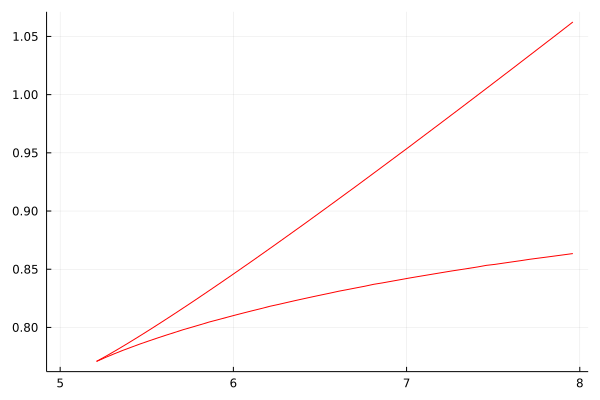

In [79]:
k = [8.01-0.05*n for n in 1:60]
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,k[1],0.6],(@lens _[3]), opts)
p1 = [br1.specialpoint[1].param]
p2 = [br1.specialpoint[2].param]
x1 = br1.specialpoint[1].x
x2 = br1.specialpoint[2].x
x = [br1.x]
p = [br1.param]
for n=2:60
    opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
    br1, = continuation(F,[6.5],[0.5,k[n],0.6],(@lens _[3]), opts)
    if length(br1.specialpoint)>0
        append!(p1,br1.specialpoint[1].param)
        append!(p2,br1.specialpoint[2].param)
        append!(x1,br1.specialpoint[1].x)
        append!(x2,br1.specialpoint[2].x)
    else    
        append!(p1,NaN)
        append!(p2,NaN)
        append!(x1,NaN)
        append!(x2,NaN)
    end
    append!(x,[br1.x])
    append!(p,[br1.param])
end
plot(k,p1,color=:red,legend=false)
plot!(k,p2,color=:red)

In [80]:
pl1=plot()
@manipulate throttle=0.05 for az=0:5:90, el=0:5:90
    for n=1:60
        N = length(x[n])
        plot!(pl1,k[n]*ones(N,),p[n],x[n],color=:gray,alpha=0.1,legend=false,camera = (az,el))
    end    
    plot!(pl1,k,p1,x1,color=:red,legend=false)
    plot!(pl1,k,p2,x2,color=:red,legend=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["az"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 19, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008141c4c0, Task (runnable) @0x000000008141c4c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"5\",\"10\",\"15\",\"20\",\"25\",\"30\",\"35\",\"40\",\"45\",\"50\",\"55\",\"60\",\"65\",\"70\",\"75\",\"80\",\"85\",\"90\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4438008287303399721\

In [ ]:
FJ = BifurcationKit.getJet(F; matrixfree=false)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(FJ[1],FJ[2],[6.5],[0.5,7.0,0.6],(@lens _[3]), opts; recordFromSolution = (x, p) -> (x = x[1]))
opts2 =  ContinuationPar(opts, pMin=5.0,pMax=7.0, ds = -0.001, dsmax = 0.04)
br2, = continuation(FJ[1:2]..., br1, 1, (@lens _[2]), opts2; detectCodim2Bifurcation=2,updateMinAugEveryStep = 1)
plot(br2)

## Cusp forma Normal

El sistema anterior resulta sumamente arduo de resolver analiticamente, vamos a tomar un ejemplo mas sencillo dependiente de dos parametros (aunque no tiene una aplicacion directa) que tambien experimenta dos bifurcaciones de nodos silla que se juntan en un punto cusp en el espacio de parametros. En realidad el ejemplo es la "formal normal" de esta bifurcacion aunque en el curso no entramos en el detalle de lo que son las formas normales (al menos de manera formal), asi que por ahora podemos tomarla como la forma mas simple o universal.

El sistema es:

$\dot{x} = \mu_1 + \mu_2 x - x^3$ 

Vamos a evitarnos la tarea de calcular los puntos fijos (que implica resolver la cubica como en el caso anterior) e interpretar el miembro derecho (campo vector) geometricamente. Si recordamos la forma de la cubica (sin termino cuadratico) cuando estudiamos los puntos fijos del oscilador de Duffing, podia ser tipo "N" o no dependiendo de is el signo de la parte lineal con respecto a la cubica. En este caso la diferencia es que $\mu_1$ suma como una constante. Si tenemos $\mu_2>0$ la cubica forma una "N" y podemos tener uno o tres puntos fijos dependiendo del valor de $\mu_1$ que sube o baja la curva con un valor constante:

In [ ]:
#ejemplo con mu2=1 y diferentes valores de mu1
x = -1.5:0.01:1.5
p1=plot(x,.5 .+x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .+x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .+x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300))

Podemos anticipar que van a ocurrir dos bifurcaciones de nodo silla cuando se pase de 1 a 3 puntos fijos y viceversa. Si en cambio $\mu_2<0$ La cubica esta "estirada" hay siempre un punto fijo (atractor, la pendiente es negativa) y no hay bifurcaciones.

In [ ]:
# ahora con mu2=-1
p1=plot(x,.5 .-x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .-x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .-x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300))

Por lo tanto podemos inferir que en algun punto las dos bifurcaciones de nodo silla van a tener que colisionar en un punto cusp. No es dificil ver en este caso que eso ocurre para $\mu_2=0$, $\mu_1=0$

Tampoco es dificil dibujar el diagrama de bifurcaciones. Vamos a dejar fijo $\mu_2$ por ahora y estudiar el diagrama de bifurcaciones en el plano ($\mu_1,x$) como haciamos con la bifurcaciones de codimension 1.

En ese caso recordemos que los puntos fijos corresponden con curvas que estan dadas de forma implicita por $f(x,\mu_1)=0$ donde $f$ es el miembro derecho de la ecuacion (el campo vector). En este caso es mucho mas facil despejar de forma explicita $\mu_1$ en funcion de $x$ (para un valor de  fijo).

$\mu_1(x) = x^3 - \mu_2 x$

que como antes si $\mu_2>0$ es una cubica con forma de "N" que se estira para el otro caso, pero acostada:

In [ ]:
x = -1:0.01:1
@manipulate for μ2=-1:0.01:1
    plot()
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!([-2*x0^3],[x0],color=:red)
        scatter!([2*x0^3],[-x0],color=:red)
    end   
    plot!(x.^3-μ2*x,x);plot!([-1,1],[0,0],xrange=(-0.5,0.5),legend=false)
end

Ademas podemos calcular para que valores de ($\mu_1,x$) ocurren las bifurcaciones de nodo silla (en el caso de $\mu_2>0$). Solo tenemos que encontrar cuando la derivada de $\mu_1$ con respecto a $x$ se hace cero y eso sucede cuando $3x^2 = \mu_2$ o sea para los puntos: 

$x=-\sqrt{\mu_2/3}$ ,  $\mu_1=2\left( \sqrt{\mu_2/3}\right)^3$

$x=\sqrt{\mu_2/3}$ ,  $\mu_1=-2\left( \sqrt{\mu_2/3} \right)^3$

esos puntos estan representados en el grafico interactivo de arriba

Vamos ahora a trazar el diagrama de bifurcaciones completo en el espacio de parametros ($\mu_1,\mu_2$). Las curvas que determinan la bifurcacion de nodo silla en este espacio corresponden a los dos puntos calculados anteriormente pero ahora expresados como $\mu_1$ en funcion de $\mu_2$ en el dominio $\mu_2>0$ 

$\mu_1= \pm 2\left( \sqrt{\mu_2/3}\right)^3$

In [ ]:
μ2list = 0:0.01:1
@manipulate throttle=.1 for μ2=-0.5:0.01:1
    p1 = plot(x.^3-μ2*x,x);plot!([-1,1],[0,0],xlims=(-0.5,0.5),legend=false)
    p2 = plot(-2*sqrt.(μ2list/3).^3,μ2list,xlims=(-0.5,0.5),legend=false,color=:red)
    p2 = plot!(2*sqrt.(μ2list/3).^3,μ2list,ylims=(-0.5,1),color=:red)
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!(p1,[-2*x0^3],[x0],color=:red)
        scatter!(p1,[2*x0^3],[-x0],color=:red)
        scatter!(p2,[-2*x0^3],[μ2],color=:red)
        scatter!(p2,[2*x0^3],[μ2],color=:red)
    else
        scatter!(p2,[0],[μ2],color=:gray)
    end   
    plot(p1,p2,layout=(2,1),size=(400,500))
end

# Bifurcacion Takens-Bogdanov (codimension 2)

Las bifurcaciones (de codimension 1) que vimos hasta ahora se pueden caracterizar en dos grupos:

- Las que suceden cuando un autovalor real se hace cero. Tenemos de forma generica una bifurcacion de nodo silla, pero tambien una pitchfork o una transcritica si se dan otras condiciones de simetria.
- La que sucede cuando la parte real de dos autovalores complejos conjugados se hace cero. En ese caso tenemos una bifurcacion de Hopf.

Claramente el primer caso puede suceder en un sistema 1D (o uno de mayor dimension a lo largo de una direccion particular), mientras que el segundo necesitamos al menos un sistema 2D para tener dos autovalores, pero hace falta solo un parametro para controlarla (para mover la parte real). 

Pero si estamos en un sistema 2D, no podria suceder que **ambos** autovalores se hagan cero de forma simultanea? Claramente si vemos la expresion de los autovalores vamos a necesitar al menos dos parametros para ajustar este punto. Por otra parte que dos autovalores crucen el cero por el eje real seria algo asi como dos nodo-silla sucediendo al mismo tiempo, pero tambien podria verse como una bifurcacion de Hopf con parte imaginaria cero. Es decir este tipo de bifurcacion "degenerada" tiene adentro al menos dos nodo silla (como la cusp) y una Hopf. 

Esta bifurcacion de codimension 2 se conoce como doble cero o Bogdanov-Takens (o Takens-Bogdanov). La forma normal  esta caracterizada por tener el siguiente Jacobiano:

$
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
$

el cual "induce" que aparezcan los siguientes terminos no lineales (en la version de Bogdanov):

$\dot{x} = y$

$\dot{y} = x^2-xy$

Notar que todavia no introdujimos ningun parametro, esto es la singularidad "pura". Para extender esto en el espacio de parametros (o de sistemas dinamicos para ser mas preciso) es necesario hacer un **unfolding**, y aca hay varias posibilidades, vamos tomar la que hace Guckenheimer & Holmes:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy$

Vamos a estudiar directamente las bifurcaciones sin preocuparnos todavia por las soluciones porque este sistema (al igual del nodo silla en el plano) tiene trayectorias divergentes.

Como tenemos terminos hasta orden cuadratico vamos a poder tener de forma generica dos puntos fijos o ninguno. Siempre ubicados en el eje horizontal $y=0$ y con la coordenada $x$ en:

$x_{\pm}=-\frac{\mu_2}{2}\pm \sqrt{\frac{\mu_2^2}{4}-\mu_1}$

El signo positivo corresponde al punto fijo de la derecha y el negativo al de la izquierda (cuando estos existan).

la condicion para existencia de los puntos fijos es que el interior de la raiz sea positivo lo cual nos da una condicion para trazar una curva de bifurcacion nodos silla en el plano $(\mu_1,\mu_2)$:

SN : $\mu_1=\frac{\mu_2^2}{4}$

Por otra parte el Jacobiano evaluado en los puntos fijos (conservando el orden $\pm$) queda escrito 

$
\begin{pmatrix}
0 & 1\\
\pm 2\sqrt{\frac{\mu_2^2}{4}-\mu_1} & \frac{\mu_2}{2}\mp \sqrt{\frac{\mu_2^2}{4}-\mu_1}
\end{pmatrix}
$

Lo cual nos da el determinante:

$\Delta = \mp 2\sqrt{\frac{\mu_2^2}{4}-\mu_1}$

que para el punto fijo de la derecha es siempre negativo (punto silla) y para el de la izquierda positivo. Para este ultimo evaluamos la traza (solo conservamos el signo de abajo):

$\tau = \frac{\mu_2}{2}+\sqrt{\frac{\mu_2^2}{4}-\mu_1} $

como la raiz es positiva cuando $\mu_2<0$, la traza se va a hacer cero cuando $\mu_1=0$. Esto nos da la condicion para trazar la curva de la bifurcacion de Hopf  en el plano $(\mu_1,\mu_2)$:

Hopf: $\mu_2>0$  , $\mu_1=0$

Esta curva se junta con la parabola SN en el punto $(0,0)$ asi que tal como habiamos anticipado en este punto singular tenemos una curva SN y una Hopf ocurriendo simultaneamente. El diagrama de bifurcaciones completo (tomado de la Scholarpedia) es:

<div>
<img src="../files/BogdanovTakens.gif" width="500px">
</div>


Notar que hay una curva adicional (en rojo) que corresponde a una bifurcacion global (conexion homoclinica). No vamnos a estudiar bifurcaciones globales pero podemos decir que las mas comunes ocurren cuando las variedades estables e inestables de diferentes puntos silla se conectan entre si (conexion heteroclinica) o en el mismo punto silla como en este caso (conexion homoclinica). Explorar las como se modifican las variedades en el grafico de abajo y tratar de localizar cuando se produce la conexion homoclinica. Como guia se muestra a la derecha el diagrama de bifurcaciones con las curvas SN y Hopf analiticas y en linea punteada la homclinica que ocurre (no vamos a mostrar la deduccion de eso) cuando:

HC: $\mu_1 = -\frac{6}{25}\mu_2^2$ ,  $\mu_2<0$


In [ ]:
function takens!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+p[2]*u[1]+u[1]*u[1]-u[1]*u[2]
    du
end    

In [ ]:
function takens_jac(u,p) 
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = p[2]+2*u[1]-u[2]
  J[2,2] = -u[1]
  return J
end

In [ ]:
@manipulate throttle=0.5 for μ1=-1:0.005:1,μ2=-1:0.005:1
    if μ1 < μ2^2/4
        u0_array=[[-μ2/2-sqrt(μ2^2/4-μ1);0],[-μ2/2+sqrt(μ2^2/4-μ1);0]]
        p1=plot_manifolds(takens!,takens_jac,u0_array,[μ1,μ2];tmax=100,delta=1e-6,xlims=[-1.5,1.5],ylims=[-1,1],size=(400,400))
    else 
        p1=plot()
    end 
    p2 = plot(0.25*(-1:0.01:1).^2,-1:0.01:1,color=:blue,legend=false)
    plot!(p2,-6/25*(-1:0.01:0).^2,-1:0.01:0,color=:red,legend=false)
    plot!(p2,[0,0],[-1,0.0],color=:green)
    scatter!(p2,[μ1],[μ2],xlims=(-0.5,0.5))
    plot(p1,p2,layout=(1,2),size=(900,400))
end    

Si bien en este caso pudimos calcular las curvas de bifurcacion de forma analitica (al menos SN y Hopf) Vamos a usar BifurcationToolkit para seguir las curvas de bifurcacion. Empezamos con la mas facil que es la SN



In [ ]:
takens(u,p) = takens!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.28, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens,(z,p) -> ForwardDiff.jacobian(x -> takens(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-1.0],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
plot(br1)

In [ ]:
SN, = continuation(FJ[1],FJ[2],br1,2,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=1.0); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN)

In [ ]:
H, = continuation(FJ[1],FJ[2],br1,1,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
plot(SN,branchlabel="SN")
plot!(H,branchlabel="Hopf")

## Bogdanov Takens con terminos cubicos

Como puede verse la bifurcacion BT presenta una dinamica muy interesante y variada, con minimas alteraciones en los parametros se puede pasar de comportamientos oscilatorios, creacion de pares de puntos fijos y orbitas de periodo infinito (conexiones HC). El problma del sistema anterior es que tiene trayectorias divergentes, por lo cual necesitamos agregar terminos de orden mas alto (que no van a alterar la bifurcacion de BT aunque si pueden cambiar el diagrama de bifurcaciones fuera de ese punto) que aseguren que las trayectorias no diverjan. De vuelta hay varias alternativas, vamos a seguir la que propone Mindlin:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy - x^3 -x^2y$ 

En este caso al tener terminos cubicos vamos a tener de forma general uno o tres puntos fijos, como en el caso de la cusp los puntos fijos pasan de ser 1 a 3 a traves de bifurcaciones de nodo silla que ocurren en pares de puntos distintos. De hecho los terminos cubicos lo que hacen es introducir una cusp ademas de la Bogadanov-Takens.

Vamos a ver como se organizan las variedades a partir 

In [143]:
function takens3!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+u[1]*(p[2]-u[2]+u[1]*(1-u[1]-u[2]))
    du
end    

takens3! (generic function with 1 method)

In [113]:
@manipulate throttle=0.1 for μ1=-0.15:0.001:0.1,μ2=-0.4:0.001:0.1
    phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-1,1],ylims=[-0.5,0.5])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 251, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
126, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000012051f50, Task (runnable) @0x0000000012051f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.15\",\"-0.149\",\"-0.148\",\"-0.147\",\"-0.146\",\"-0.145\",\"-0.144\",\"-0.143\",\"-0.142\",\"-0.141\",\"-0.14\",\"-0.139\",\"-0.138\",\"-0.137\",\"-0.136\",\"-0.135\",\"-0.134\",\"-0.133\",\"-0.132\",\"

[:hopf, :bp, :bp]

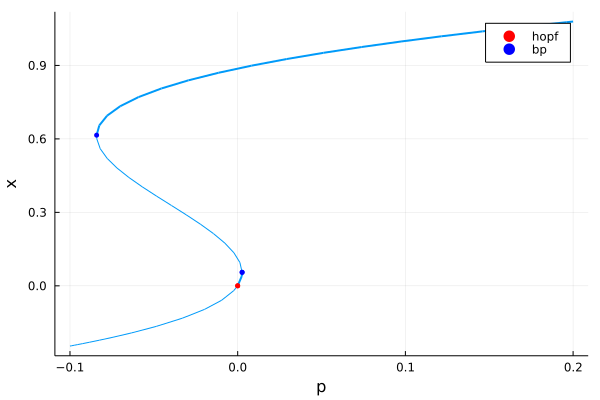

In [144]:
takens3(u,p) = takens3!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.2, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens3,(z,p) -> ForwardDiff.jacobian(x -> takens3(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.1],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
print([pt.type for pt in br1.specialpoint])
plot(br1)

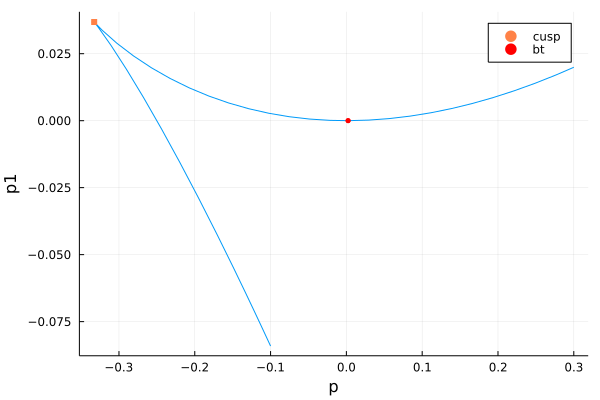

In [145]:
SN, = continuation(FJ[1],FJ[2],br1,3,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.3,ds=-0.001); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN)

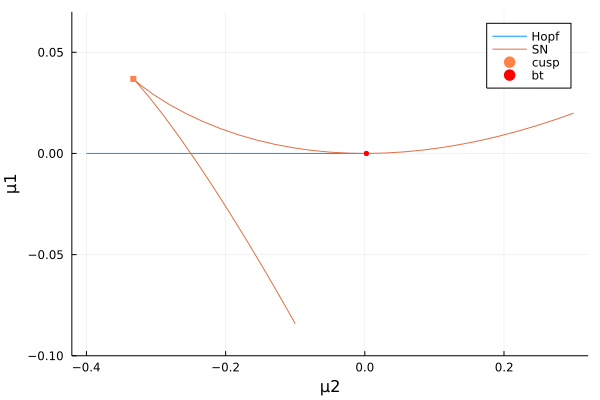

In [146]:
br2, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.4],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
H, = continuation(FJ[1],FJ[2],br2,1,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))

In [118]:
@manipulate throttle=0.1 for μ1=-0.25:0.001:0.1,μ2=-0.4:0.001:0.1
    p2=phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-0.7,0.7],ylims=[-0.5,0.5])
    p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
    plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))
    scatter!(p1,[μ2],[μ1],label=false)
    plot(p1,p2,layout=(1,2),size=(900,400))
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 351, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
176, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000112eeef0, Task (runnable) @0x00000000112eeef0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.25\",\"-0.249\",\"-0.248\",\"-0.247\",\"-0.246\",\"-0.245\",\"-0.244\",\"-0.243\",\"-0.242\",\"-0.241\",\"-0.24\",\"-0.239\",\"-0.238\",\"-0.237\",\"-0.236\",\"-0.235\",\"-0.234\",\"-0.233\",\"-0.232\",\"